In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import cifar10
import numpy as np
import json
import os

In [2]:
#importing, scaling reshaping and vectorizing the data set
((trainX, trainY), (testX, testY)) = cifar10.load_data()

#scaling data
trainX = trainX.astype('float')/255.0
testX = testX.astype('float')/255.0


#vectorizing the labels
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.fit_transform(testY)

In [3]:
#initializing the label names
labelNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 
             'frog', 'horse', 'ship', 'truck']

In [4]:
#initializing the model
chanDim= -1
def model():
    
    model = Sequential()
    #first layer of Conv2D
    model.add(Conv2D(32, (3,3), padding = 'same', input_shape = (32, 32, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Conv2D(32, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    
    #second layer of Conv2D
    model.add(Conv2D(64, (3,3), padding = 'same', input_shape = (32, 32, 3)))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Conv2D(64, (3,3), padding = 'same'))
    model.add(Activation('relu'))
    model.add(BatchNormalization(axis = chanDim))
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(Dropout(0.25))
    
    #FC layet
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    return model

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________

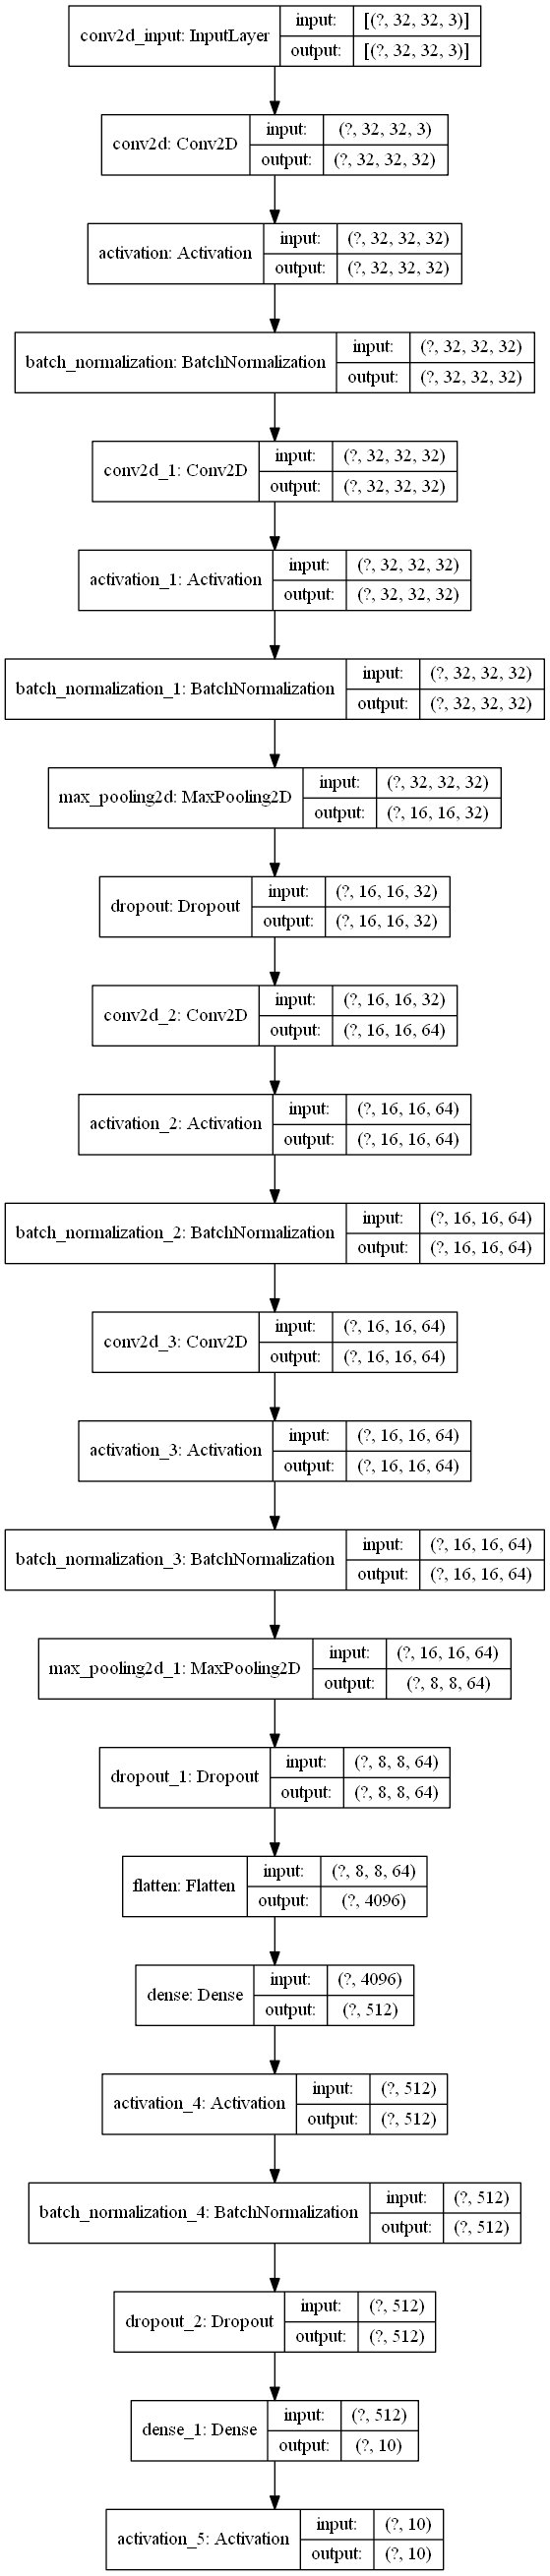

In [5]:
#initializing the optimizer and model
opt = SGD(lr = 0.01, momentum = 0.9, nesterov = True)
model = model()
model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
model.summary()
plot_model(model, to_file = 'VGGNet.png', show_shapes = True)